In [1]:
import json
import requests
res=requests.get("https://od.cdc.gov.tw/eic/NHI_EnteroviralInfection.json")

In [2]:
result=json.loads(res.text)

In [3]:
import pandas as pd
df=pd.DataFrame(result)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112173 entries, 0 to 112172
Data columns (total 7 columns):
健保就診總人次      112173 non-null object
就診類別         112173 non-null object
年            112173 non-null object
年齡別          112173 non-null object
縣市           112173 non-null object
腸病毒健保就診人次    112173 non-null object
週            112173 non-null object
dtypes: object(7)
memory usage: 6.0+ MB


In [10]:
df['腸病毒健保就診人次'] = df['腸病毒健保就診人次'].astype(int)

In [5]:
dftest=df.isnull()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112173 entries, 0 to 112172
Data columns (total 7 columns):
健保就診總人次      112173 non-null object
就診類別         112173 non-null object
年            112173 non-null object
年齡別          112173 non-null object
縣市           112173 non-null object
腸病毒健保就診人次    112173 non-null int64
週            112173 non-null object
dtypes: int64(1), object(6)
memory usage: 6.0+ MB


In [15]:
df.groupby('年')['腸病毒健保就診人次'].sum()

年
2008    360000
2009    270178
2010    855397
2011    409542
2012    483404
2013    578879
2014    503170
2015    535773
2016    590212
2017    455533
2018     90356
Name: 腸病毒健保就診人次, dtype: int64

In [16]:
print(type(df.groupby('年')['腸病毒健保就診人次'].sum()))

<class 'pandas.core.series.Series'>


In [17]:
se1=df.groupby('年')['腸病毒健保就診人次'].sum()

In [18]:
se1.index

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object', name='年')

In [19]:
se1.values

array([360000, 270178, 855397, 409542, 483404, 578879, 503170, 535773,
       590212, 455533,  90356])

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

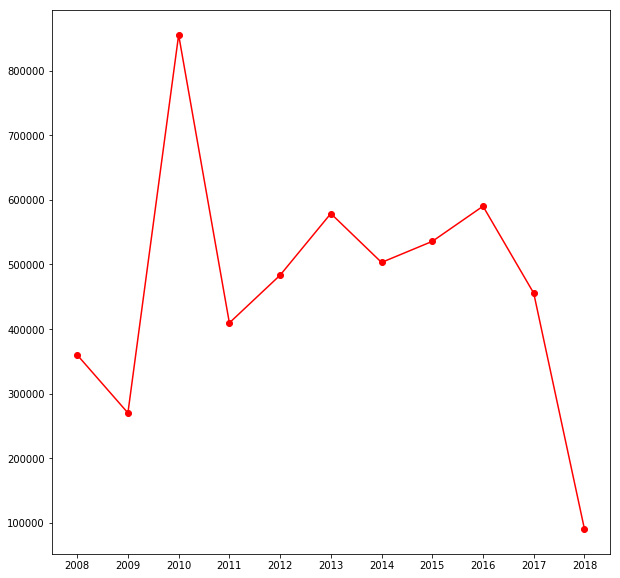

In [27]:
plt.figure(figsize=(10,10))
plt.plot(se1.index,   se1.values,  'o-', color='red')

In [6]:
print(type(dftest))

<class 'pandas.core.frame.DataFrame'>


In [7]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112173 entries, 0 to 112172
Data columns (total 7 columns):
健保就診總人次      112173 non-null bool
就診類別         112173 non-null bool
年            112173 non-null bool
年齡別          112173 non-null bool
縣市           112173 non-null bool
腸病毒健保就診人次    112173 non-null bool
週            112173 non-null bool
dtypes: bool(7)
memory usage: 766.9 KB


In [9]:
df[:10]

,健保就診總人次,就診類別,年,年齡別,縣市,腸病毒健保就診人次,週
0,105,住院,2008,0-2,台中市,0,14
1,151,住院,2008,0-2,台北市,2,14
2,14,住院,2008,0-2,台東縣,0,14
3,20,住院,2008,0-2,台南市,0,14
4,44,住院,2008,0-2,宜蘭縣,0,14
5,17,住院,2008,0-2,花蓮縣,0,14
6,1,住院,2008,0-2,金門縣,0,14
7,19,住院,2008,0-2,屏東縣,0,14
8,1,住院,2008,0-2,苗栗縣,0,14
9,141,住院,2008,0-2,桃園市,0,14


In [9]:
import seaborn as sns
titanic=sns.load_dataset('titanic')

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [11]:
ser_age=titanic['age']

In [14]:
print(ser_age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


In [15]:
age_test=ser_age.isnull()
print(type(age_test))

<class 'pandas.core.series.Series'>


In [16]:
age_test

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
       ...  
861    False
862    False
863     True
864    False
865    False
866    False
867    False
868     True
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878     True
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

In [17]:
null_where=[]
leng=len(age_test)
for i in range(leng):
    if age_test[i] == True:
        null_where.append(i)
print(null_where)

[5, 17, 19, 26, 28, 29, 31, 32, 36, 42, 45, 46, 47, 48, 55, 64, 65, 76, 77, 82, 87, 95, 101, 107, 109, 121, 126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186, 196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264, 270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330, 334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388, 409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457, 459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507, 511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563, 564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612, 613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680, 692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768, 773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837, 839, 846, 849, 859, 863, 868, 878, 888]


In [18]:
len(null_where)

177

In [19]:
891-177

714